In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Metoda Eulera

In [89]:
def euler(y, dt, lmd, N):
    for n in range(0, N - 1):
        y[n + 1] = y[n] + dt * lmd * y[n]

def RK2(y, dt, lmd, N):
    for n in range(0, N - 1):
        k1 = lmd * y[n]
        k2 = lmd * (y[n] + dt*k1)
        y[n + 1] = y[n] + 0.5*dt*(k1+k2)

def RK4(y, dt, lmd, N):
    for n in range(0, N - 1):
        k1 = lmd * y[n]
        k2 = lmd * (y[n] + 0.5*dt*k1)
        k3 = lmd * (y[n] + 0.5*dt*k2)
        k4 = lmd * (y[n] + dt*k3)

        y[n + 1] = y[n] + (dt/6)*(k1 + 2*k2 + 2*k3 + k4)


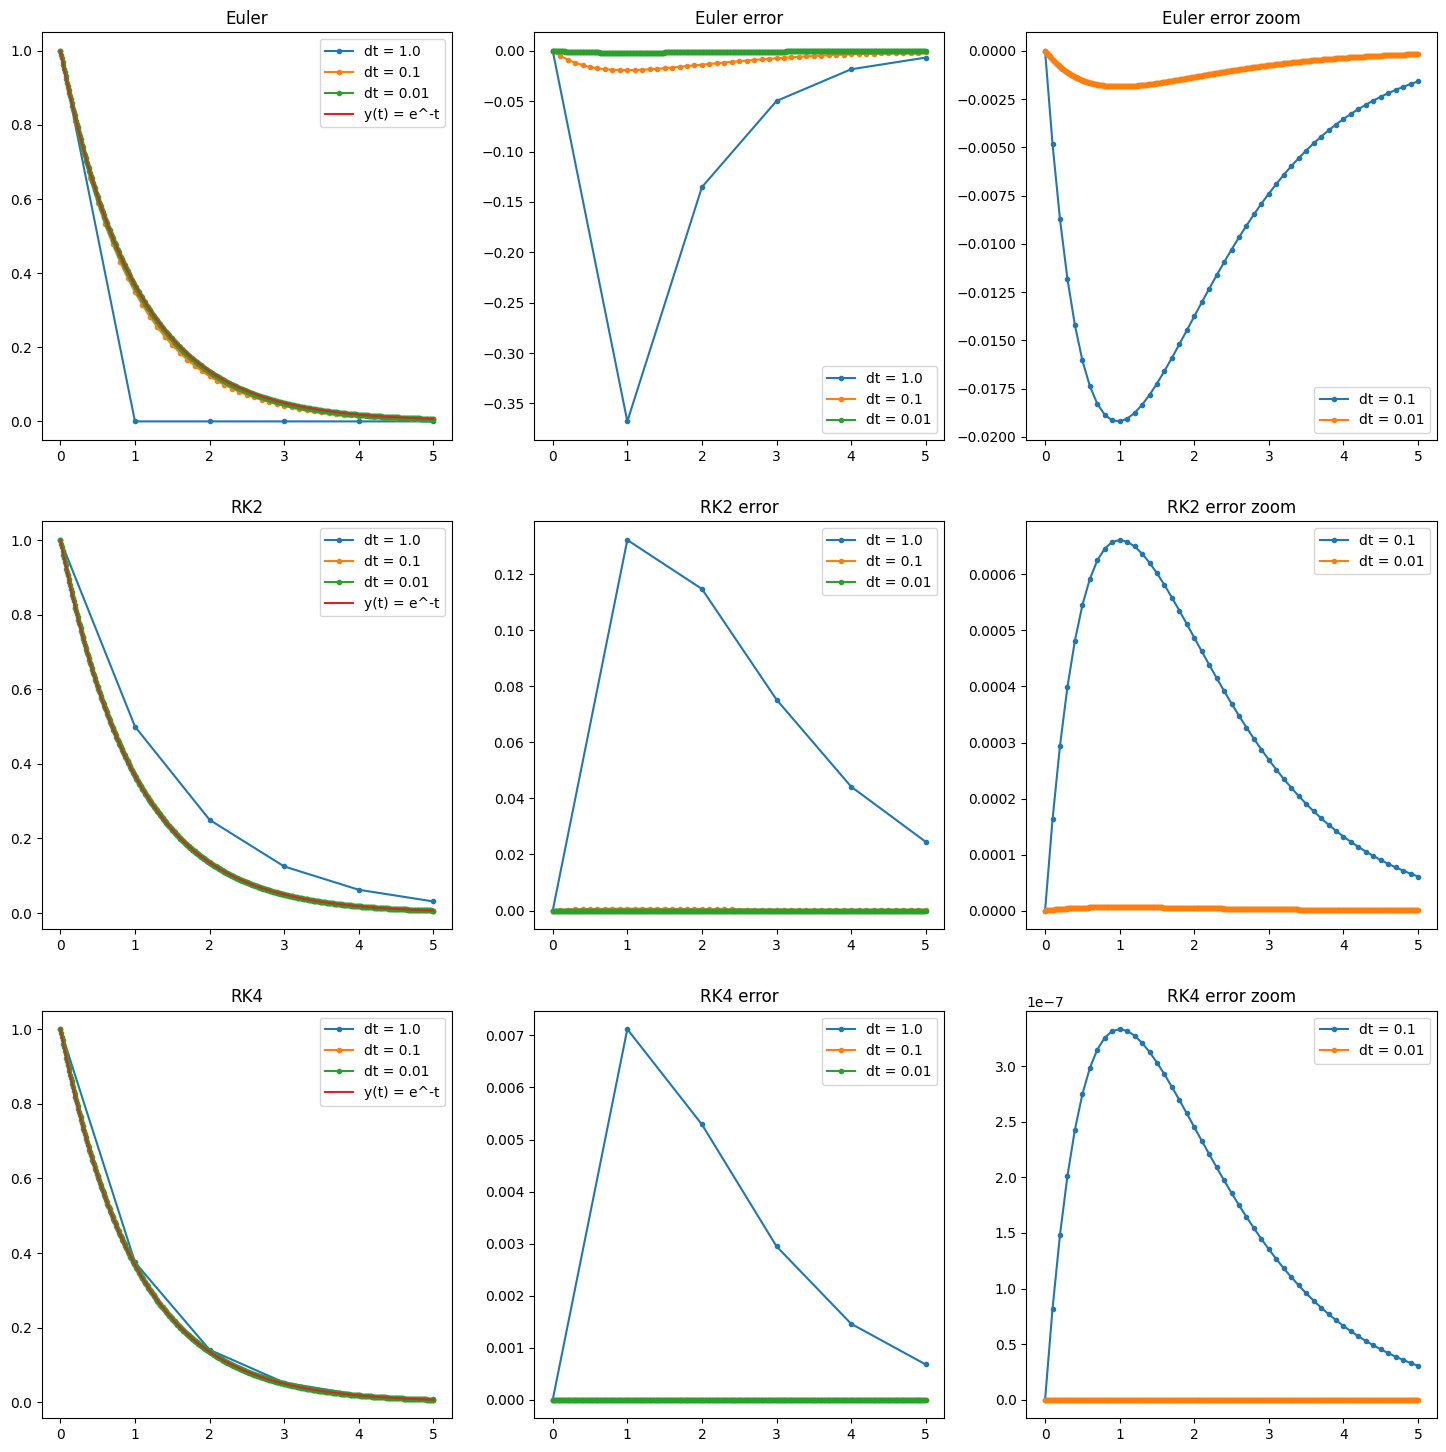

In [90]:
num_methods = [
    (euler, "Euler"),
    (RK2, "RK2"),
    (RK4, "RK4"),
]

axs = plt.subplots(len(num_methods), 3, figsize=(18, 6*len(num_methods)))[1]

t_min = 0
t_max = 5

for method_idx, method_data in enumerate(num_methods):
    method, method_name = method_data

    for dt in [1.0, 0.1, 0.01]:
        t = np.arange(t_min, t_max+dt, dt)
        yd = np.exp(-t)

        N = t.size
        y = np.zeros(t.size)
        err = np.zeros(t.size)

        y[0] = 1
        lmd = -1

        method(y, dt, lmd, N)

        ax = axs[method_idx, 0]
        ax.plot(t, y, ".-")
        ax.set_title(f"{method_name}")

        err = y - yd
        ax = axs[method_idx, 1]
        ax.plot(t, err, ".-")
        ax.set_title(f"{method_name} error")

        if dt < 1:
            ax = axs[method_idx, 2]
            ax.plot(t, err, ".-")
            ax.set_title(f"{method_name} error zoom")

    ax = axs[method_idx, 0]
    ax.plot(t, yd, "-")
    ax.legend(["dt = 1.0", "dt = 0.1", "dt = 0.01", "y(t) = e^-t"])

    ax = axs[method_idx, 1]
    ax.legend(["dt = 1.0", "dt = 0.1", "dt = 0.01"])

    ax = axs[method_idx, 2]
    ax.legend(["dt = 0.1", "dt = 0.01"])
